In [22]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
#import datetime as dt
import pytz
from pprint import pprint


In [23]:
#onecall = True  # 8 days
onecall = False # 5 days

In [24]:
# Headers to mimic the browser 
headers = { 
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36' 
}

def get_location(city='paris',API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'):
    base_url = 'http://api.openweathermap.org/data/2.5/weather?appid='+API_Key+'&q='+city
    current = requests.get(url = base_url, headers = headers).json()
    lat = current['coord']['lat']
    lon = current['coord']['lon']
    return lat,lon

def human_date(d):
   #return datetime.fromtimestamp(d, pytz.timezone('Europe/Paris')).strftime('%d/%m/%Y %H:%M:%S')
   return datetime.fromtimestamp(d, pytz.timezone('Europe/Paris')).strftime('%d/%m %H:%M')

def get_date(timestamp):
    return human_date(timestamp).split(' ')[0]

def get_time(timestamp):
    return human_date(timestamp).split(' ')[1]

def print_day(n):
    pprint(onecall_data['daily'][n])


# 8 days forecast


In [25]:
onecall = False

In [26]:
if onecall:
    API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'
    lat, lon = get_location()
    base_url = 'https://api.openweathermap.org/data/2.5/onecall?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
    data_for = '8 days'
    # request data
    try:
        print('Requesting json data')
        onecall_data = requests.get(url = base_url, headers = headers).json()
        #print(onecall_data)
    except:
        exit()

    # make dataframe and save
    print('Creating dataframe: ', data_for)

    df = onecall_data['daily']
    l = len(df[0])

    _8days = pd.DataFrame.from_records(df)
    print('Converting timestamp to human date')
    for k in _8days.keys()[:5]:
        #print(k)
        if k=='dt':  # date for dt
            _8days[k] = _8days[k].apply(get_date)
        else:        # time for other columns
            _8days[k] = _8days[k].apply(get_time)            
    _8days
    
    _8days.keys(), len(_8days.keys())

    print('Selecting columns')
    # select multiple column ranges
    focus = np.r_[:6, 8:14, 16:l]
    focus_idx = _8days.keys()[focus]

    status2 = pd.DataFrame(_8days[focus_idx])
    demain = status2.loc[1]

    demain
    
    focus

    # zip and save
    print('Save to CSV')
    compression_opts = dict(method='zip', archive_name='demain.csv')
    demain.to_csv('demain.zip', index=False, compression=compression_opts)
    # no compression 
    demain.to_csv('demain.csv')
    #pprint(onecall_data)
    print(_8days.iloc[0])  # today

    # plot temperature
    l = []
    for i in range(0,8):
        l.append(_8days.iloc[i].temp)

    df = pd.DataFrame(l)
    df.plot()
    plt.title('8 days forecast')
    plt.ylabel('Temp °C')
    plt.xlabel('Days')
    plt.grid()
    plt.show()

   
# 5 days forecast


In [27]:

API_Key = '56040ff66d50184c81a4df3a770657e3'
#API_Key = '42a2df3beefb73f7161413a3f5a53f2a'
lat, lon = get_location(API_Key=API_Key)
base_url = 'https://api.openweathermap.org/data/2.5/forecast?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
data_for = '5 days'
try:
    print('Requesting json data')
    forecast = requests.get(url = base_url, headers = headers).json()
    print(forecast)
except:
    exit()


Requesting json data
{'cod': '200', 'message': 0, 'cnt': 40, 'list': [{'dt': 1742634000, 'main': {'temp': 11.29, 'feels_like': 10.98, 'temp_min': 11.29, 'temp_max': 11.9, 'pressure': 1003, 'sea_level': 1003, 'grnd_level': 993, 'humidity': 96, 'temp_kf': -0.61}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'clouds': {'all': 75}, 'wind': {'speed': 2.87, 'deg': 138, 'gust': 7.97}, 'visibility': 10000, 'pop': 1, 'rain': {'3h': 0.7}, 'sys': {'pod': 'd'}, 'dt_txt': '2025-03-22 09:00:00'}, {'dt': 1742644800, 'main': {'temp': 12.65, 'feels_like': 12.22, 'temp_min': 12.65, 'temp_max': 15.38, 'pressure': 1002, 'sea_level': 1002, 'grnd_level': 992, 'humidity': 86, 'temp_kf': -2.73}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'clouds': {'all': 83}, 'wind': {'speed': 3.98, 'deg': 131, 'gust': 6.64}, 'visibility': 10000, 'pop': 0.93, 'rain': {'3h': 0.52}, 'sys': {'pod': 'd'}, 'dt_txt': '2025-03-22 12:00:00'}, {'dt': 

In [28]:
# make dataframe and save
print('Creating dataframe: ', data_for)

df = forecast['list']
_5days = pd.DataFrame.from_records(df)
print(_5days.iloc[0])


Creating dataframe:  5 days
dt                                                   1742634000
main          {'temp': 11.29, 'feels_like': 10.98, 'temp_min...
weather       [{'id': 500, 'main': 'Rain', 'description': 'l...
clouds                                              {'all': 75}
wind                  {'speed': 2.87, 'deg': 138, 'gust': 7.97}
visibility                                                10000
pop                                                         1.0
rain                                                {'3h': 0.7}
sys                                                {'pod': 'd'}
dt_txt                                      2025-03-22 09:00:00
Name: 0, dtype: object


In [29]:
_5days.keys()


Index(['dt', 'main', 'weather', 'clouds', 'wind', 'visibility', 'pop', 'rain',
       'sys', 'dt_txt'],
      dtype='object')

In [30]:
_5days['date'] = _5days['dt'].apply(get_date)
_5days['human_date'] = _5days['dt'].apply(human_date)
_5days['time'] = _5days['dt'].apply(get_time)
main = pd.DataFrame.from_records(_5days['main'])
_5days = pd.concat([_5days,main],axis=1)

print(_5days[['human_date', 'time', 'temp_max','temp_min']])


     human_date   time  temp_max  temp_min
0   22/03 10:00  10:00     11.90     11.29
1   22/03 13:00  13:00     15.38     12.65
2   22/03 16:00  16:00     16.82     14.98
3   22/03 19:00  19:00     14.09     14.09
4   22/03 22:00  22:00     11.06     11.06
5   23/03 01:00  01:00      9.86      9.86
6   23/03 04:00  04:00      8.65      8.65
7   23/03 07:00  07:00      7.99      7.99
8   23/03 10:00  10:00      9.92      9.92
9   23/03 13:00  13:00     12.08     12.08
10  23/03 16:00  16:00     13.77     13.77
11  23/03 19:00  19:00     12.67     12.67
12  23/03 22:00  22:00     11.13     11.13
13  24/03 01:00  01:00      9.96      9.96
14  24/03 04:00  04:00      9.13      9.13
15  24/03 07:00  07:00      8.48      8.48
16  24/03 10:00  10:00     12.19     12.19
17  24/03 13:00  13:00     15.75     15.75
18  24/03 16:00  16:00     16.36     16.36
19  24/03 19:00  19:00     13.14     13.14
20  24/03 22:00  22:00     11.64     11.64
21  25/03 01:00  01:00      9.81      9.81
22  25/03 0

In [31]:
_5days['human_date']

0     22/03 10:00
1     22/03 13:00
2     22/03 16:00
3     22/03 19:00
4     22/03 22:00
5     23/03 01:00
6     23/03 04:00
7     23/03 07:00
8     23/03 10:00
9     23/03 13:00
10    23/03 16:00
11    23/03 19:00
12    23/03 22:00
13    24/03 01:00
14    24/03 04:00
15    24/03 07:00
16    24/03 10:00
17    24/03 13:00
18    24/03 16:00
19    24/03 19:00
20    24/03 22:00
21    25/03 01:00
22    25/03 04:00
23    25/03 07:00
24    25/03 10:00
25    25/03 13:00
26    25/03 16:00
27    25/03 19:00
28    25/03 22:00
29    26/03 01:00
30    26/03 04:00
31    26/03 07:00
32    26/03 10:00
33    26/03 13:00
34    26/03 16:00
35    26/03 19:00
36    26/03 22:00
37    27/03 01:00
38    27/03 04:00
39    27/03 07:00
Name: human_date, dtype: object

In [32]:
xticks= list(_5days['time'])
xticks

['10:00',
 '13:00',
 '16:00',
 '19:00',
 '22:00',
 '01:00',
 '04:00',
 '07:00',
 '10:00',
 '13:00',
 '16:00',
 '19:00',
 '22:00',
 '01:00',
 '04:00',
 '07:00',
 '10:00',
 '13:00',
 '16:00',
 '19:00',
 '22:00',
 '01:00',
 '04:00',
 '07:00',
 '10:00',
 '13:00',
 '16:00',
 '19:00',
 '22:00',
 '01:00',
 '04:00',
 '07:00',
 '10:00',
 '13:00',
 '16:00',
 '19:00',
 '22:00',
 '01:00',
 '04:00',
 '07:00']

In [33]:
# plot
start = _5days['time'][0]
start

'10:00'

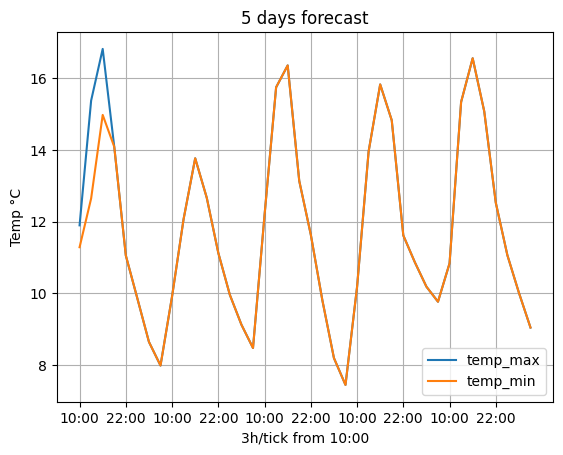

In [34]:
_5days[['temp_max','temp_min']].plot()
plt.title('5 days forecast')
plt.ylabel('Temp °C')
plt.xlabel(f'3h/tick from {start}')
plt.xticks(ticks=np.arange(0,40,4), labels=xticks[::4])
plt.grid()
plt.show()
    

In [35]:
#  https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
# locs, labels = plt.xticks()

In [36]:
# pip install seaborn
import seaborn as sns

[Text(0.5, 0, 'day&hour'),
 Text(0, 0.5, 'temp °C'),
 Text(0.5, 1.0, '5 days forecast')]

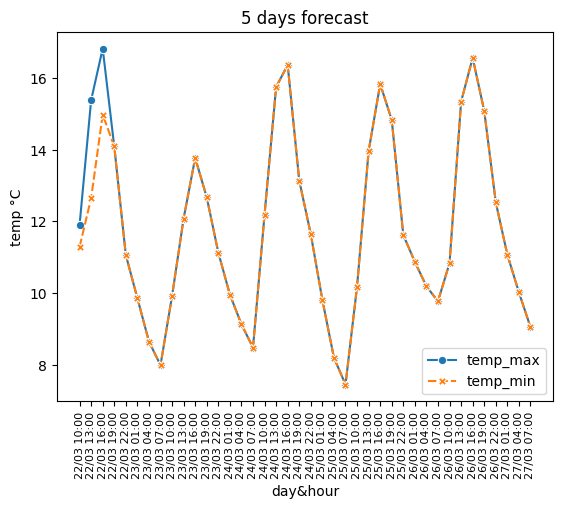

In [37]:
# plot 5 days temp for every 3 hours tick
df1 = pd.DataFrame(_5days[['human_date','temp_max','temp_min']]) 

# set index to be used as labels for x-axis
df1 = df1.set_index('human_date')
ax= sns.lineplot(data=df1, markers= True)
plt.xticks(rotation=90, fontsize=8)
#plt.grid()
ax.set(xlabel='day&hour', ylabel='temp °C', title='5 days forecast') 

[Text(0.5, 0, 'time (hours)'),
 Text(0, 0.5, 'temp °C'),
 Text(0.5, 1.0, '5 days forecast')]

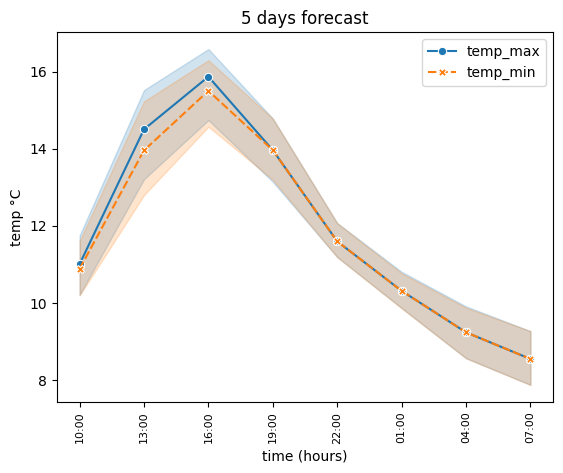

In [38]:
# index on hours get 5 days hour window variation
df2 = pd.DataFrame(_5days[['time','temp_max','temp_min']]) 
df2
df2 = df2.set_index('time')
df2
ax= sns.lineplot(data=df2, markers= True)
plt.xticks(rotation=90, fontsize=8)
ax.set(xlabel='time (hours)', ylabel='temp °C', title='5 days forecast') 

In [39]:
df2

,temp_max,temp_min
time,,
10:00,11.90,11.29
13:00,15.38,12.65
16:00,16.82,14.98
19:00,14.09,14.09
22:00,11.06,11.06
01:00,9.86,9.86
04:00,8.65,8.65
07:00,7.99,7.99
10:00,9.92,9.92


In [40]:
df2_grp = df2.groupby('time')

In [41]:
for k in df2_grp:
    print(k[1]['temp_max'], type(k[1]))
    

time
01:00     9.86
01:00     9.96
01:00     9.81
01:00    10.87
01:00    11.07
Name: temp_max, dtype: float64 <class 'pandas.core.frame.DataFrame'>
time
04:00     8.65
04:00     9.13
04:00     8.20
04:00    10.19
04:00    10.02
Name: temp_max, dtype: float64 <class 'pandas.core.frame.DataFrame'>
time
07:00    7.99
07:00    8.48
07:00    7.45
07:00    9.77
07:00    9.05
Name: temp_max, dtype: float64 <class 'pandas.core.frame.DataFrame'>
time
10:00    11.90
10:00     9.92
10:00    12.19
10:00    10.18
10:00    10.84
Name: temp_max, dtype: float64 <class 'pandas.core.frame.DataFrame'>
time
13:00    15.38
13:00    12.08
13:00    15.75
13:00    13.96
13:00    15.34
Name: temp_max, dtype: float64 <class 'pandas.core.frame.DataFrame'>
time
16:00    16.82
16:00    13.77
16:00    16.36
16:00    15.83
16:00    16.56
Name: temp_max, dtype: float64 <class 'pandas.core.frame.DataFrame'>
time
19:00    14.09
19:00    12.67
19:00    13.14
19:00    14.83
19:00    15.08
Name: temp_max, dtype: float64 

time
01:00    Axes(0.125,0.11;0.775x0.77)
04:00    Axes(0.125,0.11;0.775x0.77)
07:00    Axes(0.125,0.11;0.775x0.77)
10:00    Axes(0.125,0.11;0.775x0.77)
13:00    Axes(0.125,0.11;0.775x0.77)
16:00    Axes(0.125,0.11;0.775x0.77)
19:00    Axes(0.125,0.11;0.775x0.77)
22:00    Axes(0.125,0.11;0.775x0.77)
dtype: object

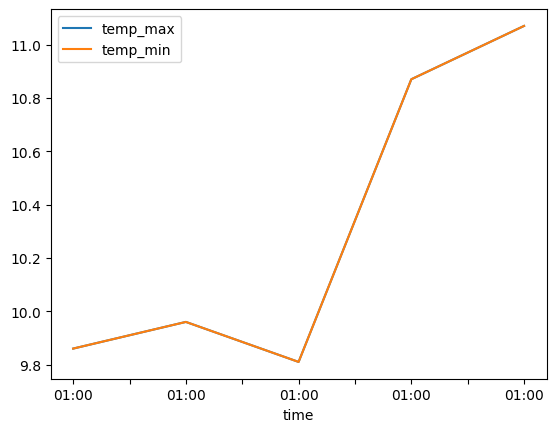

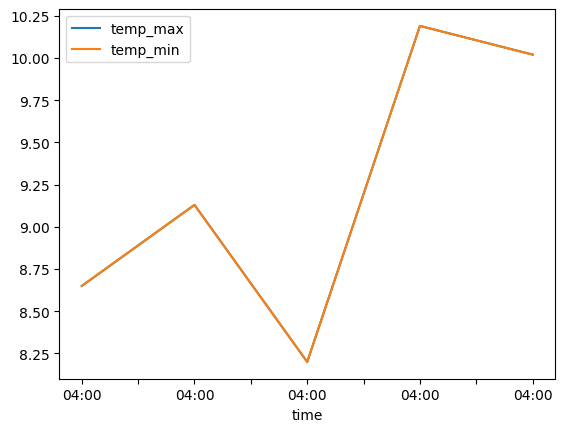

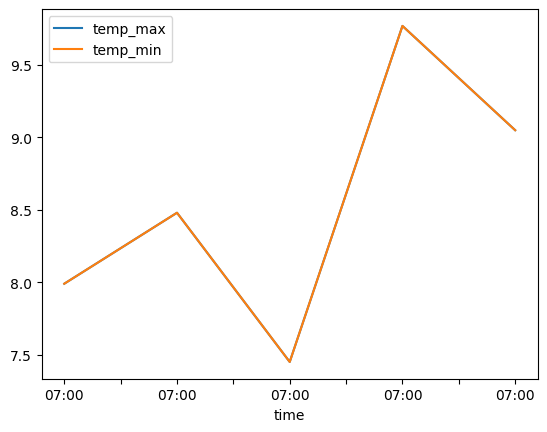

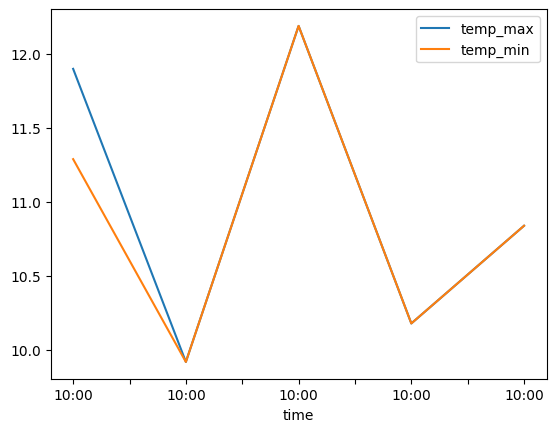

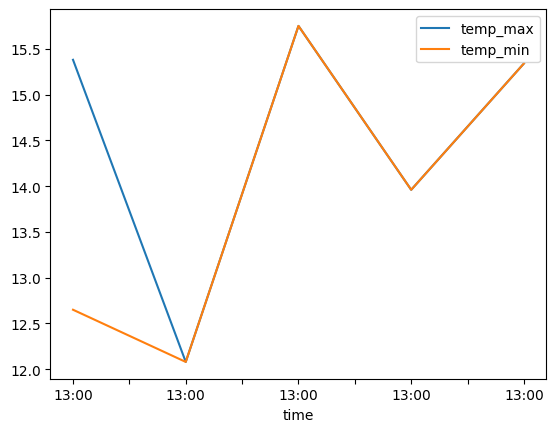

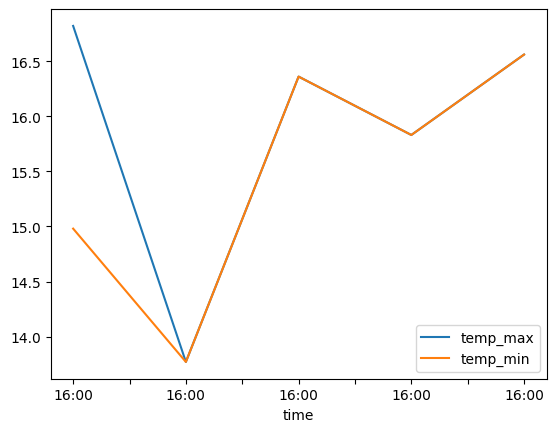

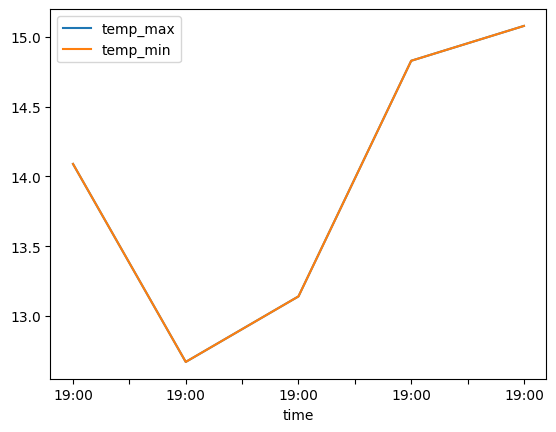

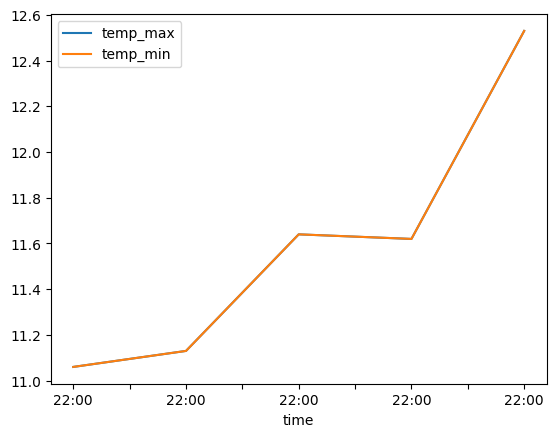

In [42]:
df2_grp.plot()